Mengimport Library Yang digunakan

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



In [ ]:
df = pd.read_csv("/content/dataset_satelit.csv")
df.head()


,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


Menghapus kolom yang tidak relevan

In [ ]:
df = df.drop(columns=['No'], errors='ignore')

Mengetahui informasi dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  594 non-null    float64
 1   Lattitude  594 non-null    float64
 2   N          594 non-null    float64
 3   P          594 non-null    float64
 4   K          593 non-null    float64
 5   Ca         594 non-null    float64
 6   Mg         594 non-null    object 
 7   Fe         594 non-null    float64
 8   Mn         594 non-null    float64
 9   Cu         594 non-null    float64
 10  Zn         594 non-null    float64
 11  B          594 non-null    float64
 12  b12        594 non-null    float64
 13  b11        594 non-null    float64
 14  b9         594 non-null    float64
 15  b8a        594 non-null    float64
 16  b8         594 non-null    float64
 17  b7         594 non-null    float64
 18  b6         594 non-null    float64
 19  b5         594 non-null    float64
 20  b4        

Mengetahui Deskripsi dataset

In [ ]:
df.describe()

,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,Zn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,594.00000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,14.86032,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,8.25804,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,0.53000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,9.72500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,13.51000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,17.78250,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,57.55000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


Mengetahui apakah ada data yang duplikat

In [ ]:
df.duplicated().sum()

np.int64(0)

Melihat apakah ada data yang kosong

In [ ]:
print("\nJumlah Missing Values:")
print(df.isnull().sum())




Jumlah Missing Values:
Longitude    0
Lattitude    0
N            0
P            0
K            1
Ca           0
Mg           0
Fe           0
Mn           0
Cu           0
Zn           0
B            0
b12          0
b11          0
b9           0
b8a          0
b8           0
b7           0
b6           0
b5           0
b4           0
b3           0
b2           0
b1           0
Sigma_VV     0
Sigma_VH     0
plia         0
lia          0
iafe         0
gamma0_vv    0
gamma0_vh    0
beta0_vv     0
beta0_vh     0
dtype: int64


Menentukan variabel dependen(x) dan independen (y)

In [ ]:
selected_features = ['Sigma_VV', 'Sigma_VH', 'gamma0_vv', 'beta0_vv']
X = df[selected_features]
y = df['N']
print("Variabel Independen (X):")
display(X.head())

print("\nVariabel Dependen (Y):")
display(y.head())

print(f"\nJumlah fitur yang digunakan: {len(selected_features)} fitur")

Variabel Independen (X):


,Sigma_VV,Sigma_VH,gamma0_vv,beta0_vv
0,0.18183,0.04461,0.22331,0.31325
1,0.22079,0.04640,0.27116,0.38033
2,0.18926,0.03992,0.23242,0.32604
3,0.14769,0.03622,0.18138,0.25440
4,0.18205,0.03797,0.22359,0.31359



Variabel Dependen (Y):


,N
0,2.64
1,2.75
2,1.77
3,2.30
4,2.05



Jumlah fitur yang digunakan: 4 fitur


Analisis Korelasi fitur yang sudah dipilih

Kolom tersedia di df: True


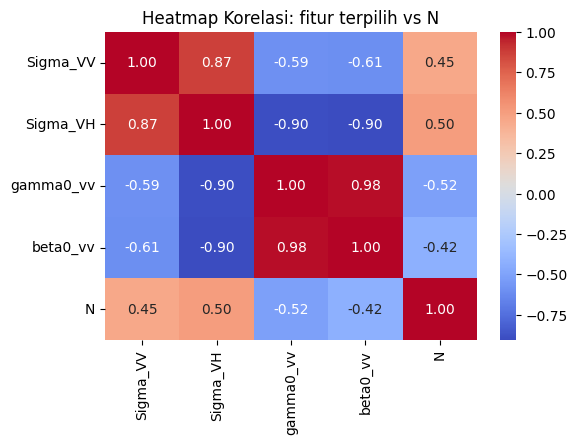


Korelasi fitur terhadap N:
N            1.000000
Sigma_VH     0.503636
Sigma_VV     0.454871
beta0_vv    -0.424251
gamma0_vv   -0.517893
Name: N, dtype: float64


In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df_sel.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap Korelasi: fitur terpilih vs N")
plt.show()

selected_features = ['Sigma_VV', 'Sigma_VH', 'gamma0_vv', 'beta0_vv']

print("Kolom tersedia di df:", all([col in df.columns for col in selected_features + ['N']]))

df_sel = df[selected_features + ['N']].copy()
for c in df_sel.columns:
    df_sel[c] = pd.to_numeric(df_sel[c], errors='coerce')
corr_to_N = df_sel.corr(numeric_only=True)['N'].sort_values(ascending=False)
print("\nKorelasi fitur terhadap N:")
print(corr_to_N)




Fitur sebelum di imputasi

In [ ]:

y = df_sel['N'].copy()
X = df_sel[selected_features].copy()
for c in X.columns:
    X[c] = pd.to_numeric(X[c], errors='coerce')

print("Missing values per fitur sebelum imputasi:")
print(X.isna().sum())

Missing values per fitur sebelum imputasi:
Sigma_VV     0
Sigma_VH     0
gamma0_vv    0
beta0_vv     0
dtype: int64


Fitur setelah di imputasi

In [ ]:

X = X.fillna(X.mean())
mask = ~y.isna()
X = X[mask]
y = y[mask]

print("\nAfter imputasi / cleaning:")
print("Shape X:", X.shape)
print("Shape y:", y.shape)


After imputasi / cleaning:
Shape X: (594, 4)
Shape y: (594,)


Membagi dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing :", X_test.shape[0])
print("\nFitur yang dipakai:")
print(X_train.columns.tolist())


Jumlah data training: 475
Jumlah data testing : 119

Fitur yang dipakai:
['Sigma_VV', 'Sigma_VH', 'gamma0_vv', 'beta0_vv']


Membangun model multiple regresi



In [ ]:
X_train_const = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_const).fit()

print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                      N   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     152.7
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           1.34e-83
Time:                        10:39:27   Log-Likelihood:                -35.498
No. Observations:                 475   AIC:                             81.00
Df Residuals:                     470   BIC:                             101.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1831      0.083     26.169      0.0

Training Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

Persamaan Regresi & Interpretasi Koefisien

In [ ]:
params = model_ols.params
intercept = params['const']
coefs = params.drop('const')
print("Intercept:", float(intercept))
print("\nKoefisien tiap fitur:")
for feat, coef in coefs.items():
    print(f"  {feat}: {coef:.6f}")

persamaan = " + ".join([f"({coef:.4f}*{col})" for col, coef in coefs.items()])
print("\nPersamaan Regresi:")
print(f"N = {intercept:.4f} + {persamaan}")


Intercept: 2.1830625206704943

Koefisien tiap fitur:
  Sigma_VV: 2.724291
  Sigma_VH: -1.198374
  gamma0_vv: -12.287272
  beta0_vv: 7.569904

Persamaan Regresi:
N = 2.1831 + (2.7243*Sigma_VV) + (-1.1984*Sigma_VH) + (-12.2873*gamma0_vv) + (7.5699*beta0_vv)


Evaluasi Model pada Data Testing

In [ ]:
X_test_const = sm.add_constant(X_test)
y_pred = model_ols.predict(X_test_const)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== Evaluasi Model (Test Set) ===")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


=== Evaluasi Model (Test Set) ===
MAE  : 0.2078
MSE  : 0.0709
RMSE : 0.2663
R²   : 0.5318


Visualisasi Prediksi vs Aktual & Tabel Hasil

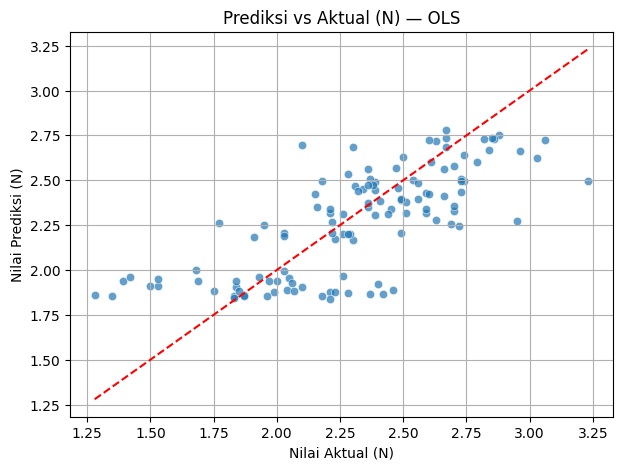

,N_Aktual,N_Prediksi,Error,Abs_Error
0,2.69,2.258082,-0.431918,0.431918
1,2.28,1.873861,-0.406139,0.406139
2,2.48,2.454593,-0.025407,0.025407
3,2.66,2.414706,-0.245294,0.245294
4,2.46,1.887830,-0.572170,0.572170
5,1.99,1.878033,-0.111967,0.111967
6,2.10,2.694829,0.594829,0.594829
7,2.66,2.562149,-0.097851,0.097851
8,2.49,2.207460,-0.282540,0.282540
9,2.31,2.466459,0.156459,0.156459



OLS summary saved to ols_summary.txt


In [ ]:

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # garis y=x
plt.xlabel("Nilai Aktual (N)")
plt.ylabel("Nilai Prediksi (N)")
plt.title("Prediksi vs Aktual (N) — OLS")
plt.grid(True)
plt.show()
hasil_df = pd.DataFrame({
    'N_Aktual': y_test.values,
    'N_Prediksi': y_pred.values
})
hasil_df['Error'] = hasil_df['N_Prediksi'] - hasil_df['N_Aktual']
hasil_df['Abs_Error'] = hasil_df['Error'].abs()
hasil_df = hasil_df.reset_index(drop=True)
display(hasil_df.head(10))
with open("ols_summary.txt", "w") as f:
    f.write(model_ols.summary().as_text())
print("\nOLS summary saved to ols_summary.txt")
